In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [181]:
data=pd.read_csv("C:/Users/91934/Desktop/Orinson Tasks/WineQualityData.csv")

In [182]:
data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [183]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [184]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


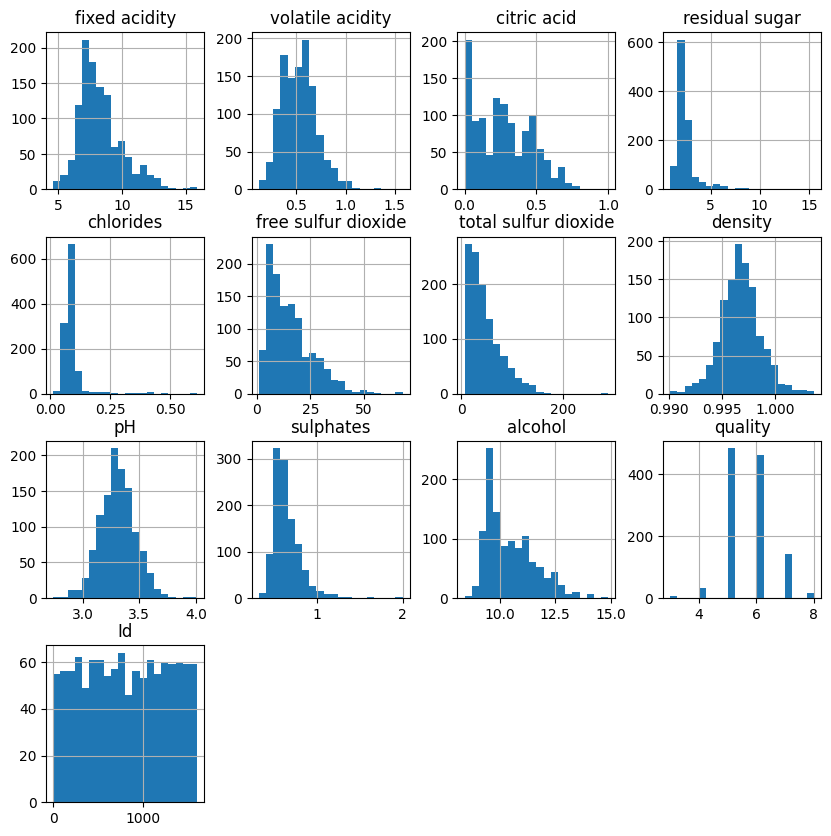

In [185]:
data.hist(bins=20, figsize=(10, 10))
plt.show()

In [186]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [187]:
# Z-Score Method: 
from scipy.stats import zscore
# Calculate Z-scores
z_scores = zscore(data["sulphates"])
z_scores.mean()
threshold = (100 -data["sulphates"].mean() )/data["sulphates"].std()
outliers_mask = abs(z_scores) > threshold

# Remove rows with outliers
data = data[~outliers_mask]

In [188]:
data["quality"].value_counts()

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

In [189]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [190]:
data["quality"]=data["quality"].map({3:0,4:1,5:2,6:3,7:4,8:5})

In [191]:
data.drop("Id",axis=1,inplace=True)

In [192]:
data.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: >

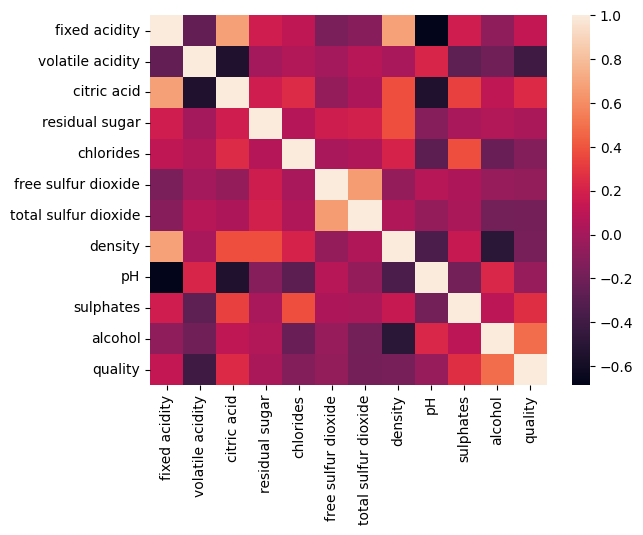

In [193]:

sns.heatmap(data.corr())

In [194]:
data.columns


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [195]:
data.drop("free sulfur dioxide",axis=1,inplace=True)

In [251]:
data



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,1
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,1
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,1
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,0
1139,6.8,0.620,0.08,1.9,0.068,38.0,0.99651,3.42,0.82,9.5,0
1140,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,1
1141,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,0


In [196]:
data.quality.value_counts()


quality
2    483
3    462
4    143
1     33
5     16
0      6
Name: count, dtype: int64

In [197]:
data.quality

0       2
1       2
2       2
3       3
4       2
       ..
1138    3
1139    3
1140    2
1141    3
1142    2
Name: quality, Length: 1143, dtype: int64

In [198]:
data["quality"]=[1 if x<3 else 0 for x in data.quality]
data.quality.value_counts()

quality
0    621
1    522
Name: count, dtype: int64

In [199]:
from sklearn.model_selection import train_test_split 

In [200]:
x = data.drop("quality",axis=1)
y = data["quality"]

In [201]:
data.columns


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'total sulfur dioxide', 'density', 'pH', 'sulphates',
       'alcohol', 'quality'],
      dtype='object')

In [202]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y)

In [203]:
xtrain.shape
ytrain.shape

(857,)

In [204]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, accuracy_score

In [205]:
dt_model = DecisionTreeClassifier()
dt_model.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [206]:
dt_ypred = dt_model.predict(xtest)

In [207]:
dt_mse = confusion_matrix(ytest, dt_ypred)
print("Decision Tree Confusion Matrix:")
print(dt_mse)

Decision Tree Confusion Matrix:
[[122  34]
 [ 41  89]]


In [208]:
print("\nDecision Tree Classification Report:")
print(classification_report(ytest, dt_ypred))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.78      0.76       156
           1       0.72      0.68      0.70       130

    accuracy                           0.74       286
   macro avg       0.74      0.73      0.73       286
weighted avg       0.74      0.74      0.74       286



Text(619.9949494949494, 0.5, 'Accuracy')

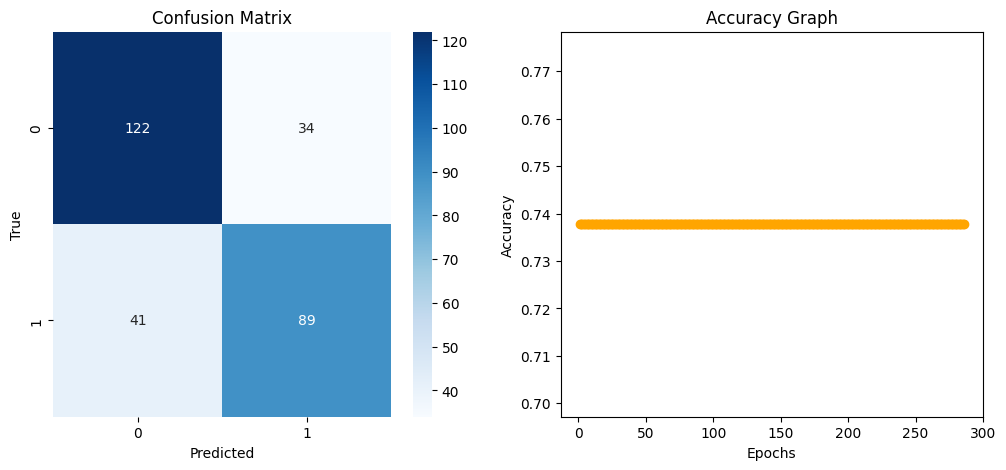

In [237]:
cm = confusion_matrix(ytest, dt_ypred)
accuracy = accuracy_score(ytest, dt_ypred)
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('True')

# Plot Accuracy Graph
epochs = list(range(1, len(dt_ypred) + 1))  # Example range for plotting
ax[1].plot(epochs, [accuracy] * len(epochs), marker='o', color='orange')
ax[1].set_title('Accuracy Graph')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')




In [215]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)


In [217]:
lr_model.fit(xtrain, ytrain)
lr_ypred = lr_model.predict(xtest)

In [218]:
lr_mse = confusion_matrix(ytest, lr_ypred)
print("Logistic Regression Confusion Matrix:")
print(lr_mse)

Logistic Regression Confusion Matrix:
[[113  43]
 [ 36  94]]


In [219]:
print("\nLogistic Regression Classification Report:")
print(classification_report(ytest, lr_ypred))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       156
           1       0.69      0.72      0.70       130

    accuracy                           0.72       286
   macro avg       0.72      0.72      0.72       286
weighted avg       0.73      0.72      0.72       286



Text(619.9949494949494, 0.5, 'Accuracy')

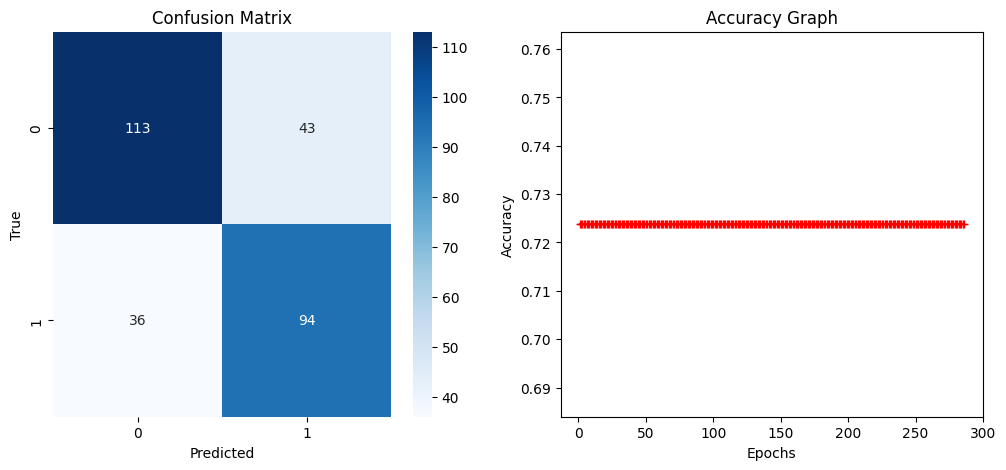

In [235]:
cm = confusion_matrix(ytest, lr_ypred)
accuracy = accuracy_score(ytest, lr_ypred)
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('True')

# Plot Accuracy Graph
epochs = list(range(1, len(lr_ypred) + 1))  # Example range for plotting
ax[1].plot(epochs, [accuracy] * len(epochs), marker='o', color='red')
ax[1].set_title('Accuracy Graph')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

In [222]:
from sklearn.ensemble import RandomForestClassifier

In [223]:
rf_model = RandomForestClassifier(n_estimators=100)

In [224]:
rf_model.fit(xtrain, ytrain)
rf_ypred = rf_model.predict(xtest)

In [225]:
rf_mse = confusion_matrix(ytest, rf_ypred)
print("Random Forest Confusion Matrix:")
print(rf_mse)

Random Forest Confusion Matrix:
[[130  26]
 [ 37  93]]


In [226]:
print("\nRandom Forest Classification Report:")
print(classification_report(ytest, rf_ypred))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       156
           1       0.78      0.72      0.75       130

    accuracy                           0.78       286
   macro avg       0.78      0.77      0.78       286
weighted avg       0.78      0.78      0.78       286



Text(619.9949494949494, 0.5, 'Accuracy')

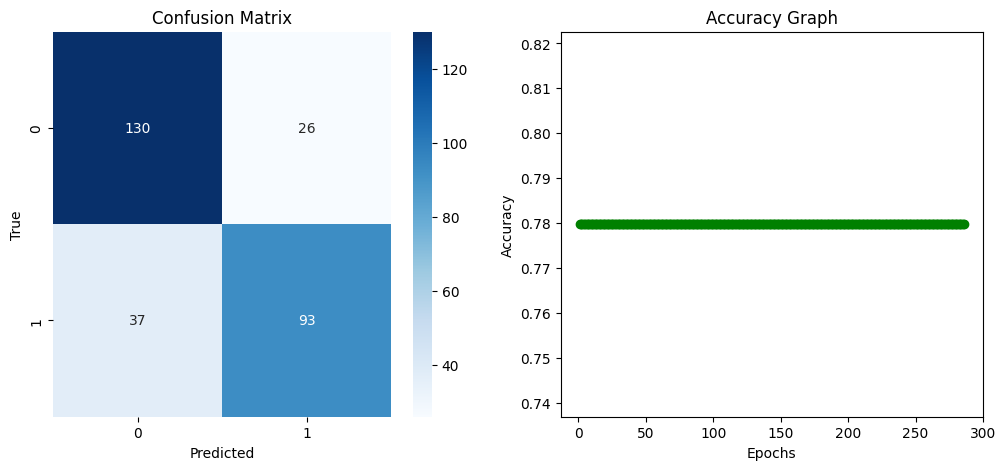

In [232]:
cm = confusion_matrix(ytest, rf_ypred)
accuracy = accuracy_score(ytest, rf_ypred)
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('True')

# Plot Accuracy Graph
epochs = list(range(1, len(rf_ypred) + 1))  # Example range for plotting
ax[1].plot(epochs, [accuracy] * len(epochs), marker='o', color='green')
ax[1].set_title('Accuracy Graph')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

In [ ]:
7.8	0.880	0.00	2.6	0.098	67.0	0.99680	3.20	0.68	9.8	

In [257]:
dt_model = DecisionTreeClassifier()
dt_model.fit(xtrain, ytrain)

def predict_wine_quality():
    print("Please provide the following values to predict wine quality: \n\n")
    
    # Taking custom input for each feature
    fixed_acidity = float(input("Enter fixed acidity: "))
    volatile_acidity = float(input("Enter volatile acidity: "))
    citric_acid = float(input("Enter citric acid: "))
    residual_sugar = float(input("Enter residual sugar: "))
    chlorides = float(input("Enter chlorides: "))
    total_sulfur_dioxide = float(input("Enter total sulfur dioxide: "))
    density = float(input("Enter density: "))
    pH = float(input("Enter pH: "))
    sulphates = float(input("Enter sulphates: "))
    alcohol = float(input("Enter alcohol: "))

 
    input_data = np.array([[fixed_acidity, volatile_acidity, citric_acid, residual_sugar,
                            chlorides, total_sulfur_dioxide, density,
                            pH, sulphates, alcohol]])
    
    prediction = model.predict(input_data)

    if(prediction[0]==1):
        print(f"\nThe wine is in a Good Quality !")
    else:
        print(f"\nThe wine is Lacking Good Quality !")
    

predict_wine_quality()

Please provide the following values to predict wine quality: 




Enter fixed acidity:  7.8
Enter volatile acidity:  0.88
Enter citric acid:  0.00
Enter residual sugar:  2.6
Enter chlorides:  0.98
Enter total sulfur dioxide:  67.0
Enter density:  0.99680
Enter pH:  3.20
Enter sulphates:  0.68
Enter alcohol:  9.8



The wine is in a Good Quality !
